In [27]:
import pandas as pd
import numpy 

df = pd.read_csv('./data/MIC.csv')

In [ ]:
print(df.shape)
df.info()

(1700, 124)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

KFK_BLOOD     1696
IBS_NASL      1628
S_AD_KBRIG    1076
D_AD_KBRIG    1076
NOT_NA_KB      686
              ... 
zab_leg_04       7
zab_leg_01       7
NA_R_1_n         5
INF_ANAM         4
IM_PG_P          1
Length: 110, dtype: int64

REC_IM
0    1541
1     159
Name: count, dtype: int64


<Axes: title={'center': 'Relapse of Myocardial Infarction'}, xlabel='REC_IM'>

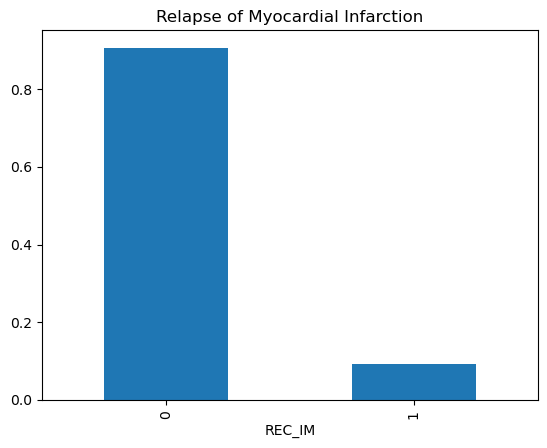

In [15]:
# Distribution of the target
counts = df['REC_IM'].value_counts()
print(counts)
df['REC_IM'].value_counts(normalize=True).plot(kind='bar', title='Relapse of Myocardial Infarction')


ZSN
0    1306
1     394
Name: count, dtype: int64


<Axes: title={'center': 'Chronic Heart Failure'}, xlabel='ZSN'>

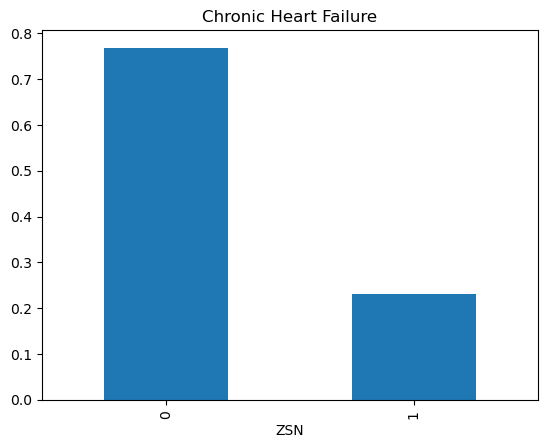

In [16]:
# Distribution of the target
counts = df['ZSN'].value_counts()
print(counts)
df['ZSN'].value_counts(normalize=True).plot(kind='bar', title='Chronic Heart Failure')

In [24]:
from scipy.stats import pointbiserialr

corrs = {}
for col in numeric:
    if col != 'REC_IM':
        corr, _ = pointbiserialr(df['REC_IM'], df[col].fillna(df[col].median()))
        corrs[col] = abs(corr)

num_corrs = pd.Series(corrs).sort_values(ascending=False)
num_corrs.head(15)


ID            0.228800
R_AB_3_n      0.184441
NA_R_3_n      0.140449
STENOK_AN     0.123538
NA_R_2_n      0.110971
R_AB_2_n      0.098325
LET_IS        0.098199
FK_STENOK     0.095924
AGE           0.090824
IBS_POST      0.077313
NA_R_1_n      0.067771
NOT_NA_2_n    0.063461
L_BLOOD       0.061972
R_AB_1_n      0.055177
DLIT_AG       0.047802
dtype: float64

numeric_vars = [
    "AGE",          # Age of patient (years)
    "S_AD_KBRIG",   # Systolic BP (emergency team)
    "D_AD_KBRIG",   # Diastolic BP (emergency team)
    "K_BLOOD",      # Serum potassium (mmol/L)
    "Na_BLOOD",     # Serum sodium (mmol/L)
    "AST_BLOOD",    # Aspartate aminotransferase (IU/L)
    "L_BLOOD"       # White blood cell count (10^9/L)
]

binary_vars = [
    "SEX",          # Male/Female
    "IBS_NASL",     # Family history of coronary disease
    "endocr_01",    # Diabetes mellitus
    "endocr_02",    # Obesity
    "B_BLOK_S_n",   # Beta-blocker therapy in ICU
    "GEPAR_S_n"     # Heparin used in ICU
]

ordinal_vars = [
    "INF_ANAM",     # Number of prior myocardial infarctions
    "STENOK_AN",    # Angina presence/timing
    "FK_STENOK",    # Functional class of angina
    "GB",           # Hypertension stage
    "ZSN_A",        # Chronic heart failure stage
    "DLIT_AG",      # Duration of hypertension
    "TIME_B_S"      # Time from onset to hospital
]

               AGE          SEX     INF_ANAM           GB        ZSN_A  \
count  1692.000000  1700.000000  1696.000000  1691.000000  1646.000000   
mean     61.856974     0.626471     0.554835     1.393258     0.194411   
std      11.259936     0.483883     0.836801     1.088803     0.658722   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     2.000000     0.000000   
75%      70.000000     1.000000     1.000000     2.000000     0.000000   
max      92.000000     1.000000     3.000000     3.000000     4.000000   

       IBS_NASL    endocr_01    endocr_02     TIME_B_S  S_AD_KBRIG  ...  \
count  72.00000  1689.000000  1690.000000  1574.000000  624.000000  ...   
mean    0.37500     0.134991     0.024852     4.684244  136.907051  ...   
std     0.48752     0.341815     0.155720     2.871044   34.997835  ...   
min     0.00000     0.000000     

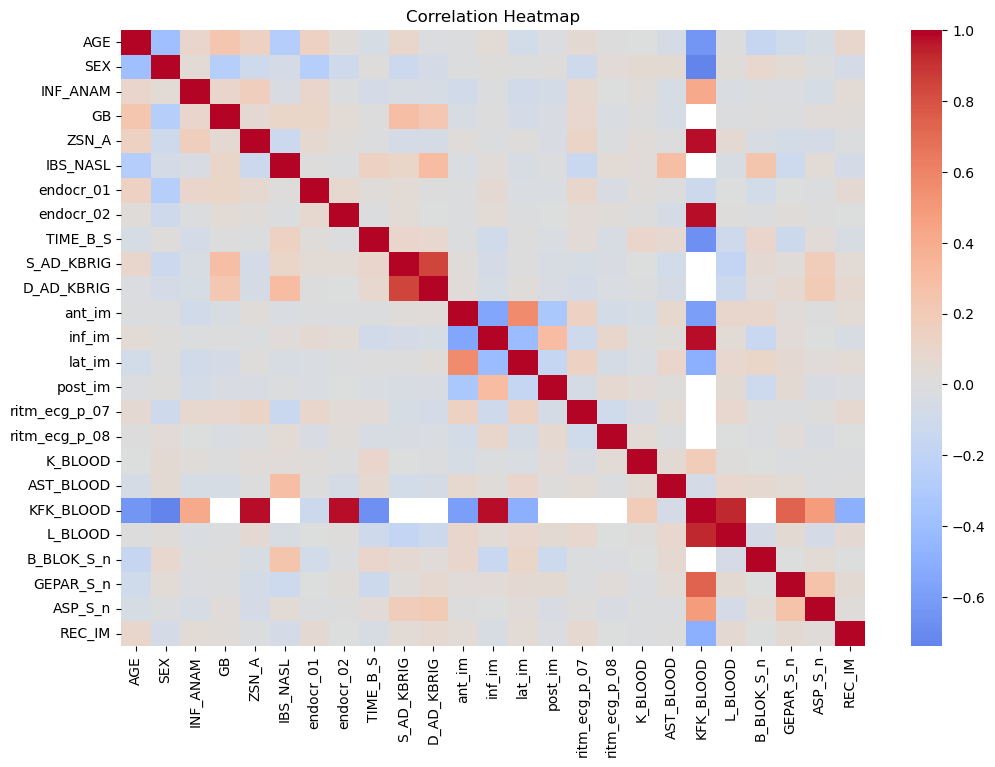

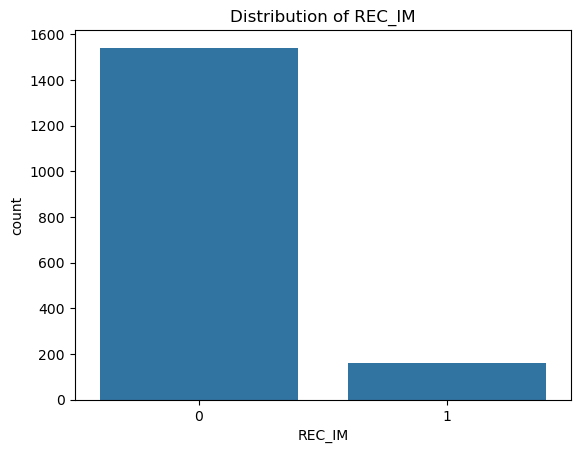

In [ ]:
target = 'REC_IM'

# Selected predictors
predictors = [
    'AGE', 'SEX', 'INF_ANAM', 'GB', 'ZSN_A', 'IBS_NASL',
    'endocr_01', 'endocr_02', 'TIME_B_S', 'S_AD_KBRIG', 'D_AD_KBRIG',
    'ant_im', 'inf_im', 'lat_im', 'post_im',
    'ritm_ecg_p_07', 'ritm_ecg_p_08',
    'K_BLOOD', 'Na_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD',
    'B_BLOK_S_n', 'GEPAR_S_n', 'ASP_S_n'
]

# Keep only available columns
predictors = [col for col in predictors if col in df.columns]

# Summary stats
print(df[predictors + [target]].describe())

# Missing values
print(df[predictors + [target]].isna().sum())

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[predictors + [target]].corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of target
sns.countplot(x=target, data=df)
plt.title('Distribution of REC_IM')
plt.show()

#KFK_BLOOD has a lot of missing values